<a href="https://colab.research.google.com/github/flowmasterB/tensorflow-flowmasterB-teaching/blob/main/001_Neural_Network_Regression_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
# Intro to neural network regression w/ tf
# predicting numbers as outcomes based on other numbers
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

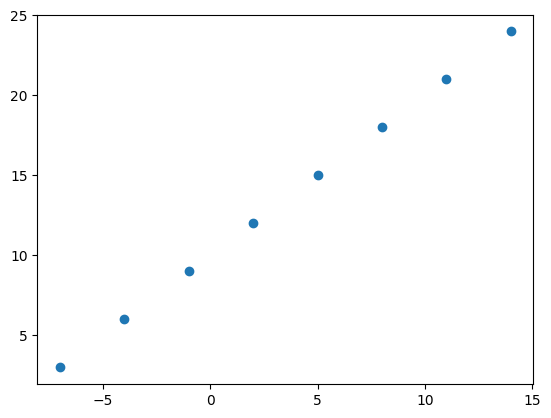

In [56]:
# create data to view and fit

# create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# creatwe labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# visualize
plt.scatter(X, y);

In [57]:
X + 10

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

In [58]:
y == X + 10 # relationship trying to learn -- the function between - ind var

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [59]:
# input and output shapes
# create a demo tensor
house_info = tf.constant(["bedrooms", "bathrooms", "# of car(s) garage space"])
house_price = tf.constant([937000])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=
 array([b'bedrooms', b'bathrooms', b'# of car(s) garage space'],
       dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([937000], dtype=int32)>)

In [60]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [61]:
X[0],  y[0]

(-7.0, 3.0)

In [62]:
# major steps in modeling w/ tf -- turn np arrays into tensors w/ dtype float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [63]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape # returned a scalar

(TensorShape([]), TensorShape([]))

# **Steps for ML modeling**
1. **create a model** - define the input and output layers, also to include the hidden
layers of a deep learning model.
2. **compile the model** -=- the function which tells our model how wrong it is -
and the optimizer -- tells our model how to improve the patterns it learns --
and evaluiation metrics -- used to interpret model performance
3. **fiting a model** -- lettring the model find patterns between X AND Y -- aka features

# **Steps in TF:**
1. Get data ready -- convert to tensors
2. build or pick a model to suit problem
3. fit the model to the data and make a prediction
4. evaluate the model
5. save and reload the trained model

In [64]:
# set random seed
tf.random.set_seed(42)

# 1. Create a model using sequential api
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1) # using one number to predict one number
])

#2. compile model
model.compile(loss=tf.keras.losses.mae, # mae = mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD stochastic gradient descent
              metrics=["mae"])

#3 fit the model
model.fit(tf.expand_dims(X, axis=1), y, epochs=5) # 5 tries to figure out a pattern


Epoch 1/5
1/1 [==============================] - 0s 315ms/step - loss: 12.3187 - mae: 12.3187
Epoch 2/5
1/1 [==============================] - 0s 12ms/step - loss: 12.1862 - mae: 12.1862
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 12.0537 - mae: 12.0537
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 11.9212 - mae: 11.9212
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 11.7887 - mae: 11.7887


In [65]:
# check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [69]:
# try to predict using the model
model.predict([27])

1/1 [==============================] - 0s 31ms/step


array([[13.887699]], dtype=float32)

In [ ]:
# Improving the model
